In [10]:
pwd

'C:\\Users\\vikram singh\\computer_vision'

In [11]:
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [12]:
df = fetch_olivetti_faces(shuffle=True)
labels = LabelBinarizer().fit_transform(df.target)

In [13]:
#Training Data
img_datatraining = df.data[0:299]
labels_datatraining = labels[0:299]

#validation Data
img_datavalid = df.data[299:349]
labels_datavalid = labels[299:349]

#Testing Data
img_datatesting = df.data[0:2]
labels_datatesting = labels[0:299]




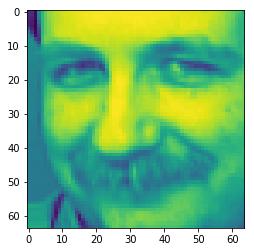

In [14]:
plt.imshow(img_datatraining[50].reshape(64,64,)) #input size of image 64,64

# convolution and polling layers

In [15]:
x = tf.placeholder(tf.float32,[None,4096])
y_ = tf.placeholder(tf.int32,[None,40])

def weight(shape):
    init = tf.truncated_normal(shape=shape,stddev = 0.1)
    return tf.Variable(init)

def bias(shape):
    init = tf.constant(0.1,shape=shape)
    return tf.Variable(init)

def conv2d(x,w):
    return tf.nn.conv2d(x,w, strides=[1,1,1,1],padding="SAME")

def max_pooling(x):
    return tf.nn.max_pool(x,ksize = [1,2,2,1],strides=[1,2,2,1],padding="SAME")


w1 = weight([5,5,1,32])
b1 = bias([32])
w2 = weight([5,5,32,64])
b2 = bias([64])
w3 = weight([5,5,64,128])
b3 = bias([128])

x_image = tf.reshape(x,[-1,64,64,1])

conv1 = tf.nn.relu(conv2d(x_image,w1) + b1)
pool1 = max_pooling(conv1)


conv2 = tf.nn.relu(conv2d(pool1,w2) + b2)
pool2 = max_pooling(conv2)

conv3 = tf.nn.relu(conv2d(pool2,w3) + b3)
pool3 = max_pooling(conv3)

w_fc1 = weight([8*8*128,1024])
b_fc1 = bias([1024])

pool_flat = tf.reshape(pool3,[-1, 8*8*128])
h_fc1 = tf.nn.relu(tf.matmul(pool_flat,w_fc1)+ b_fc1)

prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(h_fc1,prob)
w_fc2 = weight([1024,40])
b_fc2 = bias([40])

y_conv = tf.matmul(drop,w_fc2) + b_fc2


# Training

In [16]:
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_,logits = y_conv))
training_op = tf.train.AdamOptimizer(1e-4).minimize(entropy)



#Prediction measures
correct_pred = tf.equal(tf.argmax(y_conv,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
saver  = tf.train.Saver()
                        

In [ ]:
epochs = 200
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        sess.run(training_op,feed_dict = {x:img_datatraining, y_:labels_datatraining, prob: 0.5})
        acc_train = accuracy.eval(feed_dict = {x:img_datatraining,y_:labels_datatraining,prob: 1})
        acc_validation = accuracy.eval(feed_dict = {x:img_datavalid,y_:labels_datavalid,prob: 1})
        print(epoch, 'Train accuracy', acc_train, "Validation accuracy",acc_validation)
    save_path = saver.save(sess , r"C:\Users\vikram singh\computer_vision\my_face")

'C:\\Users\\vikram singh'

In [9]:
cd computer_vision/

C:\Users\vikram singh\computer_vision
